---

## Problem 
My first attempt for using machine learning to explore survival data from titanic. Main problem has been described on 
https://www.kaggle.com/c/titanic

---

## Taken references from 
* https://www.kaggle.com/chapagain/titanic-solution-a-beginner-s-guide
* https://www.kaggle.com/anaskad/step-by-step-solving-titanic-problem
* https://www.kaggle.com/startupsci/titanic-data-science-solutions/notebook
* https://www.kaggle.com/sinakhorami/titanic-best-working-classifier

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
#loading the data sets from the csv files
print('--------load train & test file------')
train_dataset = pd.read_csv('train.csv')
test_dataset = pd.read_csv('test.csv')

combined_datasets = [train_dataset, test_dataset] 

print('train dataset: %s, test dataset %s' %(str(train_dataset.shape), str(test_dataset.shape)) )
train_dataset.head()

--------load train & test file------
train dataset: (891, 12), test dataset (418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S




## Columns description 

<table align="left">
<thead>
<tr class="header">
<th>Variable Name</th>
<th>Description</th>
</tr>
</thead>
<tbody>
<tr class="odd">
<td>Survived</td>
<td>Survived (1) or died (0)</td>
</tr>
<tr class="even">
<td>Pclass</td>
<td>Passenger’s class</td>
</tr>
<tr class="odd">
<td>Name</td>
<td>Passenger’s name</td>
</tr>
<tr class="even">
<td>Sex</td>
<td>Passenger’s sex</td>
</tr>
<tr class="odd">
<td>Age</td>
<td>Passenger’s age</td>
</tr>
<tr class="even">
<td>SibSp</td>
<td>Number of siblings/spouses aboard</td>
</tr>
<tr class="odd">
<td>Parch</td>
<td>Number of parents/children aboard</td>
</tr>
<tr class="even">
<td>Ticket</td>
<td>Ticket number</td>
</tr>
<tr class="odd">
<td>Fare</td>
<td>Fare</td>
</tr>
<tr class="even">
<td>Cabin</td>
<td>Cabin</td>
</tr>
<tr class="odd">
<td>Embarked</td>
<td>Port of embarkation</td>
</tr>
</tbody>
</table>

In [3]:
print("------ column datatype info ----")
print(train_dataset.info())

print('\n\n----   train dataset column types information   -------')
dtype_df = train_dataset.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]

dtype_df.groupby("Column Type").aggregate('count').reset_index()

------ column datatype info ----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


----   train dataset column types information   -------


,Column Type,Count
0,int64,5
1,float64,2
2,object,5


In [4]:
# describing values related to numeric features
train_dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# describing values related to text data
train_dataset.describe(include=["O"])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Penasco y Castellana, Mrs. Victor de Satode (M...",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


In [6]:
# missing values in train and test datasets
pd.concat([train_dataset.isnull().sum(), test_dataset.isnull().sum()], axis=1, keys=['Train Dataset', 'Test Dataset'],sort=False) 

,Train Dataset,Test Dataset
PassengerId,0,0.0
Survived,0,NaN
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
Age,177,86.0
SibSp,0,0.0
Parch,0,0.0
Ticket,0,0.0
Fare,0,1.0


### Analysis 
- Above table shows that there are alot of missing values for Cabin and Age in both the data sets. 
- There are only 2 missing values for Embarked in Train dataset 
- There is only one missing value for Fair in Train dataset. 

In [7]:
# plotting scatter plot for all the features 
#from pandas.plotting import scatter_matrix
#scatter_matrix(train_dataset, figsize=(10, 10), diagonal='kde')

# Scatter plot didn't provide much information

# Relationship b/w different feature and survival

### overall suvival rate
<b>approx 38% </b>

In [8]:
survived = train_dataset[train_dataset['Survived'] == 1]
not_survived = train_dataset[train_dataset['Survived'] == 0]

print ("Survived: %i (%.1f%%)"%(len(survived), float(len(survived))/len(train_dataset)*100.0))
print ("Not Survived: %i (%.1f%%)"%(len(not_survived), float(len(not_survived))/len(train_dataset)*100.0))
print ("Total: %i"%len(train_dataset))

Survived: 342 (38.4%)
Not Survived: 549 (61.6%)
Total: 891


## Male v/s Female
Following graph shows that female had much higher level of survivality (~ 75%) compared to male (~ 18%)

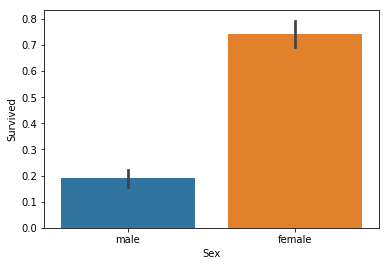

In [9]:
sns.barplot(x='Sex', y='Survived', data=train_dataset)

## Pclass v/s survivality
- Following graphs explore the impact of travelling class on survivality. It clearly shows that passengers in 1st and 2nd pclass had higher chances then 3rd class passengers. 
- Almost all women survived from pclass 1 and 2. 
- Women dying were mostly from pclass 3

In [10]:
train_dataset[['Pclass', 'Survived','PassengerId',"Embarked"]].groupby(['Pclass'], as_index=False).agg({'Survived':'mean', 
                         'PassengerId':'count',"Embarked":"count"})

,Pclass,Survived,PassengerId,Embarked
0,1,0.629630,216,214
1,2,0.472826,184,184
2,3,0.242363,491,491


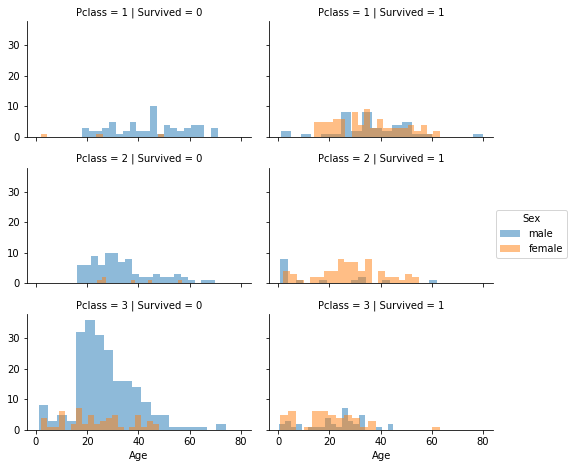

In [11]:
grid = sns.FacetGrid(train_dataset, row='Pclass', col='Survived',hue="Sex", size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

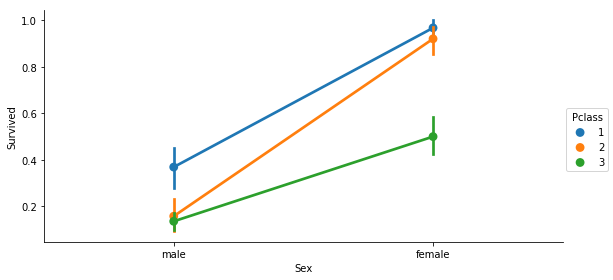

In [12]:
sns.factorplot(x='Sex', y='Survived', hue='Pclass', size=4, aspect=2, data=train_dataset)

## Embarked v/s Survived
- Passenger embarked from C had higher chances of surviving 
- Since most of passenger embarked from "S", we will use S while filling the missing values

In [13]:
train_dataset.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [14]:
# there only 2 missing values in Embarked. Since "S" is most occuring filling missing embarked valued with S
for dataset in combined_datasets:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [15]:
train_dataset[['Embarked', 'Survived',"PassengerId"]].groupby(['Embarked'], as_index=False).agg({'Survived':'mean', 
                         'PassengerId':'count'})

,Embarked,Survived,PassengerId
0,C,0.553571,168
1,Q,0.389610,77
2,S,0.339009,646


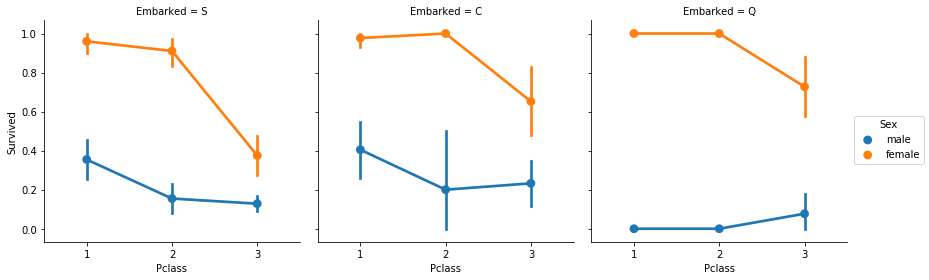

In [16]:
sns.factorplot(x='Pclass', y='Survived', hue='Sex', col='Embarked', data=train_dataset)

## Family metrics v/s survived 
* smaller groups had the higher chances of survivality
* To get family size on board we merged the Parch and SibSp. Plotting family size tell us that smaller family sizes (2 to 4) had better survivality then larger family size or travelling alone

In [17]:
train_dataset.groupby('Parch').Survived.value_counts()

Parch  Survived
0      0           445
       1           233
1      1            65
       0            53
2      0            40
       1            40
3      1             3
       0             2
4      0             4
5      0             4
       1             1
6      0             1
Name: Survived, dtype: int64

In [18]:
train_dataset[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


In [19]:
train_dataset.groupby('SibSp').Survived.value_counts()

SibSp  Survived
0      0           398
       1           210
1      1           112
       0            97
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: Survived, dtype: int64

In [20]:
train_dataset[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [21]:
for dataset in combined_datasets:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_dataset[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean()

,FamilySize,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [22]:
for dataset in combined_datasets:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
print (train_dataset[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean())

   IsAlone  Survived
0        0  0.505650
1        1  0.303538


In [23]:
## Create new column "FamilySizeGroup" and assign "Alone", "Small" and "Big"
for dataset in combined_datasets:
    dataset['FamilySizeGroup'] = 'Small'
    dataset.loc[dataset['FamilySize'] == 1, 'FamilySizeGroup'] = 'Alone'
    dataset.loc[dataset['FamilySize'] >= 5, 'FamilySizeGroup'] = 'Big'

## Age v/s Survivality 

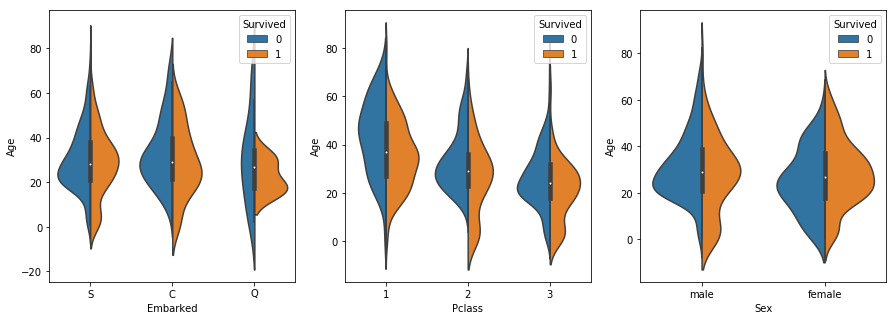

In [24]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

sns.violinplot(x="Embarked", y="Age", hue="Survived", data=train_dataset, split=True, ax=ax1)
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=train_dataset, split=True, ax=ax2)
sns.violinplot(x="Sex", y="Age", hue="Survived", data=train_dataset, split=True, ax=ax3)

From Pclass violinplot, we can see that:

- 1st Pclass has very few children as compared to other two classes.
- 1st Plcass has more old people as compared to other two classes.
- Almost all children (between age 0 to 10) of 2nd Pclass survived.
- Most children of 3rd Pclass survived.
- Younger people of 1st Pclass survived as compared to its older people.

From Sex violinplot, we can see that:
- Most male children (between age 0 to 14) survived.
- Females with age between 18 to 40 have better survival chance.

# Cleaning Data and Extracting features
## Getting Title from Name

In [25]:
# Get titles from the names
for dataset in combined_datasets:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

print(train_dataset[['Title', 'Survived']].groupby(['Title'], as_index=False).mean())
print("\n Test dataSet values \n",test_dataset["Title"].value_counts())

       Title  Survived
0       Capt  0.000000
1        Col  0.500000
2   Countess  1.000000
3        Don  0.000000
4         Dr  0.428571
5   Jonkheer  0.000000
6       Lady  1.000000
7      Major  0.500000
8     Master  0.575000
9       Miss  0.702703
10        Mr  0.156673
11       Mrs  0.793651
12       Rev  0.000000
13       Sir  1.000000

 Test dataSet values 
 Mr        240
Miss       79
Mrs        72
Master     21
Rev         2
Col         2
Dr          1
Dona        1
Name: Title, dtype: int64


In [26]:
for dataset in combined_datasets:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess', 'Col', 'Sir', 'Jonkheer'], 'Royality')
    dataset['Title'] = dataset['Title'].replace(['Dr', 'Major','Capt', 'Don', 'Rev', 'Dona'], 'Others')
    dataset['Title'] = dataset['Title'].fillna(value="Others")
    
print("\n Test dataSet values \n",train_dataset["Title"].value_counts())
print (train_dataset[['Title', 'Survived']].groupby(['Title'], as_index=False).mean())


 Test dataSet values 
 Mr          517
Miss        185
Mrs         126
Master       40
Others       17
Royality      6
Name: Title, dtype: int64
      Title  Survived
0    Master  0.575000
1      Miss  0.702703
2        Mr  0.156673
3       Mrs  0.793651
4    Others  0.235294
5  Royality  0.666667


In [27]:
# Fill null value for Fare 
for dataset in combined_datasets:
    dataset['Fare'] = dataset['Fare'].fillna(train_dataset['Fare'].median())
    
train_dataset['CategoricalFare'] = pd.qcut(train_dataset['Fare'], 4)
print (train_dataset[['CategoricalFare', 'Survived']].groupby(['CategoricalFare'], as_index=False).mean())

   CategoricalFare  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081


In [28]:
# Filling Age 
for dataset in combined_datasets:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)
    
train_dataset['CategoricalAge'] = pd.cut(train_dataset['Age'], 5)

print (train_dataset[['CategoricalAge', 'Survived']].groupby(['CategoricalAge'], as_index=False).mean())

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


  CategoricalAge  Survived
0  (-0.08, 16.0]  0.533333
1   (16.0, 32.0]  0.354767
2   (32.0, 48.0]  0.372549
3   (48.0, 64.0]  0.434783
4   (64.0, 80.0]  0.090909


In [29]:
for dataset in combined_datasets:
    # Mapping Sex
    dataset['Sex'] = dataset['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
    
    # Mapping titles
    title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royality": 5, "Others":6  }
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    
    # family mapping 
    family_mapping = {"Small": 0, "Alone": 1, "Big": 2}
    dataset['FamilySizeGroup'] = dataset['FamilySizeGroup'].map(family_mapping)
    
    # Mapping Embarked
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
    
    # Mapping Fare
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare']  = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
    
    # Mapping Age
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
    

In [30]:
train_dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilySize', 'IsAlone',
       'FamilySizeGroup', 'Title', 'CategoricalFare', 'CategoricalAge'],
      dtype='object')

## Feature Selection

In [31]:
# Feature Selection
drop_elements = ['Name', 'Ticket', 'Cabin', 'SibSp','Parch', 'FamilySize']

train_dataset = train_dataset.drop(drop_elements,axis=1)
test_dataset = test_dataset.drop(drop_elements,axis=1)
train_dataset = train_dataset.drop(['CategoricalAge', 'CategoricalFare'], axis = 1)

train_dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked',
       'IsAlone', 'FamilySizeGroup', 'Title'],
      dtype='object')

In [37]:
X = train_dataset.drop(['Survived',"PassengerId"], axis=1)
y = train_dataset['Survived']
for_prediction_df = test_dataset.drop("PassengerId", axis=1).copy()

X.shape, y.shape, for_prediction_df.shape

((891, 8), (891,), (418, 8))

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

classifiers = [
    KNeighborsClassifier(n_neighbors =10,weights="distance"),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100,random_state=1,n_jobs=2),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()]

number_of_shuffle_splits = 10
sss = StratifiedShuffleSplit(n_splits=number_of_shuffle_splits, test_size=0.1, random_state=0)

acc_dict = {}

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    for clf in classifiers:
        name = clf.__class__.__name__
        clf.fit(X_train, y_train)
        train_predictions = clf.predict(X_test)
        acc = accuracy_score(y_test, train_predictions)
        if name in acc_dict:
            acc_dict[name] += acc
        else:
            acc_dict[name] = acc

,Classifier,Accuracy
0,KNeighborsClassifier,0.816667
0,SVC,0.836667
0,DecisionTreeClassifier,0.814444
0,RandomForestClassifier,0.811111
0,AdaBoostClassifier,0.821111
0,GradientBoostingClassifier,0.821111
0,GaussianNB,0.781111
0,LinearDiscriminantAnalysis,0.812222
0,QuadraticDiscriminantAnalysis,0.804444
0,LogisticRegression,0.812222


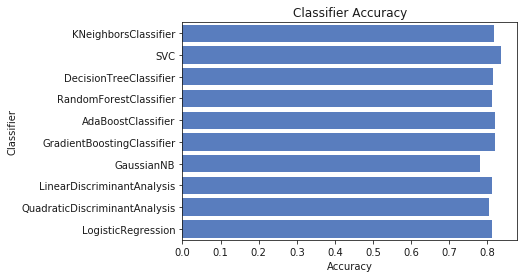

In [60]:
log_cols = ["Classifier", "Accuracy"]
log_df = pd.DataFrame(columns=log_cols)
acc_mean ={}

for clf in acc_dict:
    acc_mean[clf] = acc_dict[clf] / number_of_shuffle_splits
    log_entry = pd.DataFrame([[clf, acc_mean[clf]]], columns=log_cols)
    log_df = log_df.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log_df, color="b")

log_df

In [61]:
# SVC giving best accuracy
# Computing final prediction using SVC classifier 
candidate_classifier = SVC()
candidate_classifier.fit(X, y)
result = candidate_classifier.predict(for_prediction_df)

In [62]:
submission = pd.DataFrame({
        "PassengerId": test_dataset["PassengerId"],
        "Survived": result
    })
submission.to_csv('titanic.csv', index=False)
print('Exported')
submission

Exported


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
